In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [56]:
data = pd.read_csv('California_Houses.csv')

In [57]:
# splitting the data
# random_state ensures that every time the same random sample is taken
training_data = data.sample(frac=0.7,random_state = 42)
rest_of_data = data.drop(training_data.index)
validation_data = rest_of_data.sample(frac=0.5,random_state = 42)
testing_data = rest_of_data.drop(validation_data.index)

In [58]:
# getting our targets for training
matrix_t = training_data["Median_House_Value"].values
matrix_t = matrix_t.reshape(-1, 1) # as a column vector
# getting our targets for tuning the lambda
target_validate = validation_data["Median_House_Value"].values
target_validate = target_validate.reshape(-1,1)


In [59]:
# adding the column of ones to our matrix
num = training_data["Median_House_Value"].count()
matrix_x = np.ones((1,num))


In [60]:
# dropping the target column
input_data = training_data.drop(columns=["Median_House_Value"], inplace=False)
val_data = validation_data.drop(columns=["Median_House_Value"], inplace=False)
test_data = testing_data.drop(columns=["Median_House_Value"], inplace=False)

In [61]:
# building our maitrces
matrix_x = input_data.to_numpy()
matrix_xt = matrix_x.T
matrix_x_val = val_data.to_numpy()
matrix_x_test = test_data.to_numpy()


In [ ]:
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]  # regularization parameter
I = np.eye(matrix_x.shape[1])  # identity matrix
I[0, 0] = 0 # removing the bias from the regularization
 # ridge regression equation
mse_values = []
for l in lambda_values:
    inverse_m = np.linalg.pinv(np.dot(matrix_xt, matrix_x) + l * I)
    weights = np.dot(np.dot(inverse_m,  matrix_xt ), matrix_t)
    y_predicted = np.dot(matrix_x_val, weights)
    val = np.sum((y_predicted - target_validate)**2) / y_predicted.shape[0]
    mse_values.append(val)
best_lambda = lambda_values[np.argmin(mse_values)]


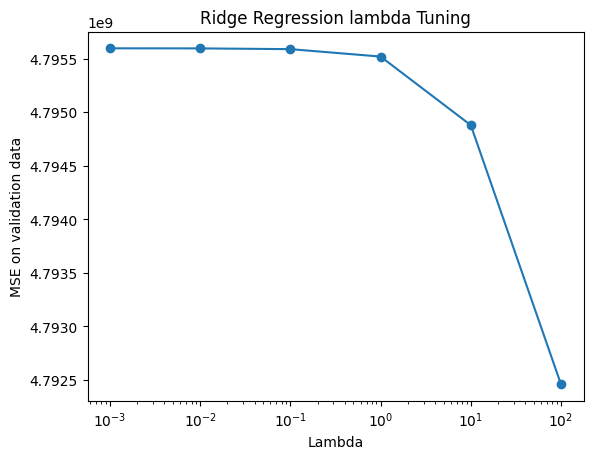

In [63]:
plt.plot(lambda_values, mse_values, marker='o')
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("MSE on validation data")
plt.title("Ridge Regression lambda Tuning")
plt.show()